### The objectives of this project are:

- check for missing values and make decision on how to handle them
- Generate categorical variable with age.
- Exploratory analysis of the data
- Review the numerical variables ,and scale variables if necessary
- Are there variables have some degree of symmetry? Apply some transformation to have a more symmmetric variable
- Are there categorical variables in the dataset?pass them to numbers.


In [1]:
#import packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv 
heart_df = pd.read_csv('Downloads/Heart.csv')
heart_df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
#shape of heart_df
heart_df.shape

(303, 15)

## Checking and Handling missing values

In [4]:
#check for missing values 
heart_df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

<AxesSubplot:>

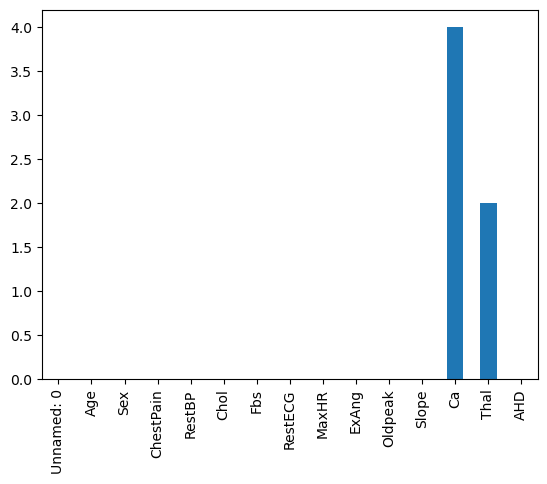

In [5]:
#visualize the missing values in the dataset
heart_df.isna().sum().plot(kind='bar')

In [6]:
#handling missing values 
#first using the rule of 5 to drop missing values

threshold = len(heart_df) * 0.05
print('threshold_value :',threshold)

cols_to_drop = heart_df.columns[heart_df.isna().sum() <= threshold]
print('\n', cols_to_drop)

heart_df.dropna(subset=cols_to_drop, inplace=True)

threshold_value : 15.15

 Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')


In [7]:
#checking for missing values 
print(heart_df.isna().sum())

print('\n')
#check the shape of the data
print('shape :', heart_df.shape)

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64


shape : (297, 15)


## Data Cleaning

The dataset contained 303 rows and 15 columns, and these were what I did to the columns:
 - From the graph above it shows that Ca and Thal column contained missing data .
 
 - All rows with missing data in the dataframe was dropped using the rule of 5%.
 
 - The data types were changed to the accurate type were necessary.
 
At the end there was 297 rows and 15 columns .

## Generate a Categorical Variable with Age

In [8]:
#check for the number of unique ages in the age category
print('Count of unique ages :', heart_df['Age'].nunique())

print('\n')
#check for the unique ages in the age category
print('unique ages :', heart_df['Age'].unique())

Count of unique ages : 41


unique ages : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]


In [9]:
#Explore the Age column using the describe function
print(heart_df['Age'].describe())

print('\n')

#create bins for the various age categories
twenty_fifth = heart_df['Age'].quantile(0.25)
median = heart_df['Age'].median()
seventy_fifth = heart_df['Age'].quantile(0.75)
maximum = heart_df['Age'].max()

#create a label and bins for the various age categories
labels = ['young_adult','middle_age','older_adult','elderlies']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

#create a category column for age
heart_df['Age_cat'] = pd.cut(heart_df['Age'], labels=labels, bins=bins)

count    297.000000
mean      54.542088
std        9.049736
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64




In [10]:
#show table showing the Age and Age_cat columns side by side
heart_df[['Age','Age_cat']]

,Age,Age_cat
0,63,elderlies
1,67,elderlies
2,67,elderlies
3,37,young_adult
4,41,young_adult
...,...,...
297,57,older_adult
298,45,young_adult
299,68,elderlies
300,57,older_adult


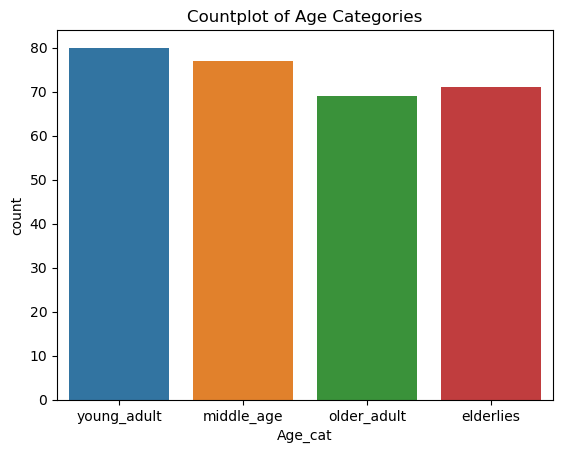

In [11]:
#visualization of the Age_cat column
sns.countplot(x='Age_cat',data=heart_df)
plt.title('Countplot of Age Categories')
plt.show()

## Exploratory Data Analysis

In [12]:
#read data 
heart_df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,elderlies
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,elderlies
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,elderlies
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,young_adult
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,young_adult


In [13]:
#create categorical column for sex and angina by exercice(ExAng) columns
heart_df['Sex_cat'] = np.where(heart_df['Sex']==1,'Male','Female')
heart_df['ExAng_cat'] = np.where(heart_df['ExAng']==1, 'yes', 'no')

heart_df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat,Sex_cat,ExAng_cat
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,elderlies,Male,no
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,elderlies,Male,yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,elderlies,Male,yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,young_adult,Male,no
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,young_adult,Female,no


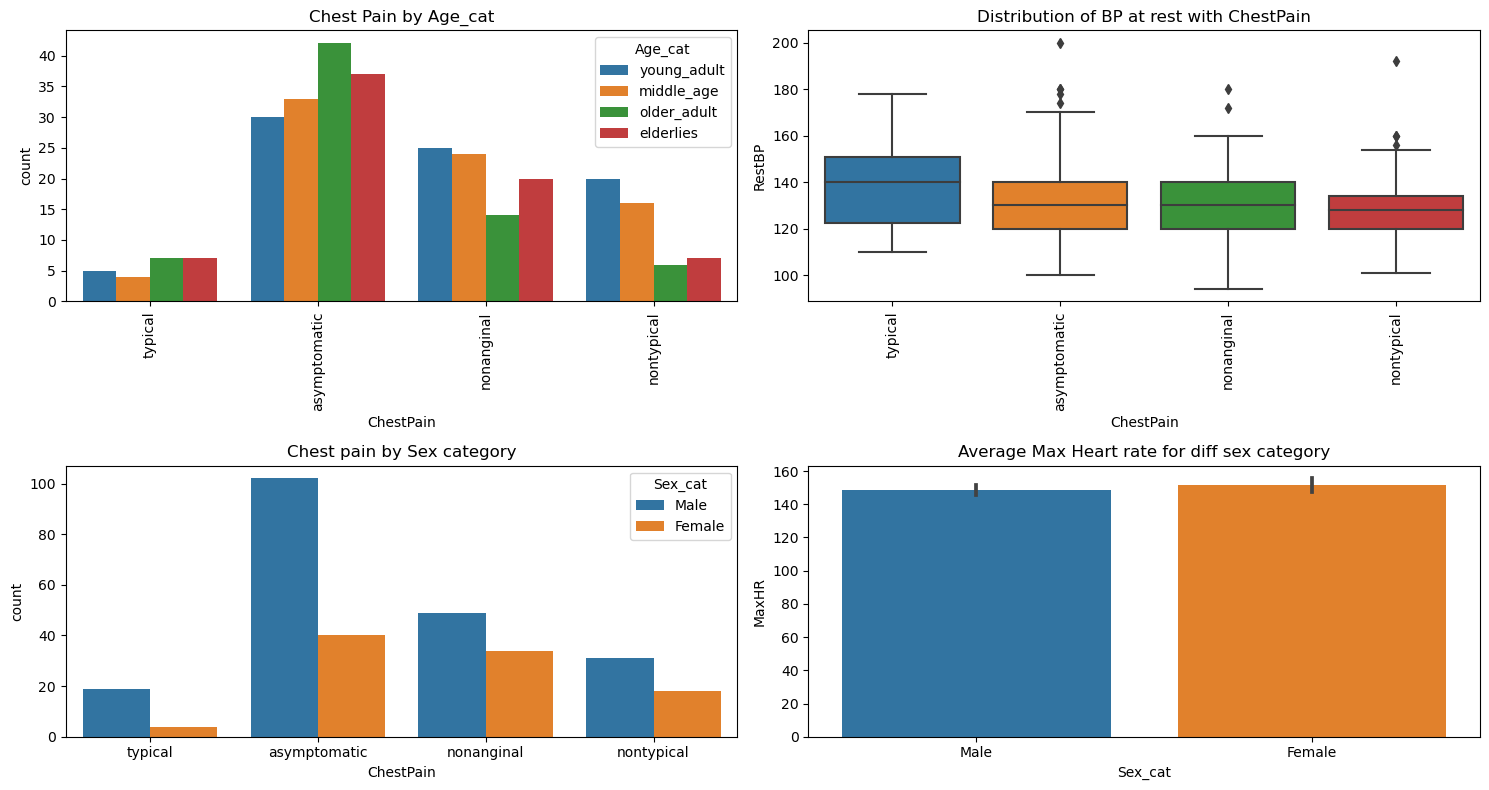

In [14]:
#exploring the various categorical columns 

fig,axs = plt.subplots(nrows=2, ncols=2, sharey=False,figsize=(15,8))
fig.subplots_adjust(hspace=0.5)
g = sns.countplot(x='ChestPain',hue='Age_cat',data=heart_df, ax=axs[0,0])
g.set_title('Chest Pain by Age_cat')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=90)
g = sns.boxplot(x='ChestPain', y='RestBP', data=heart_df, ax=axs[0,1])
g.set_title('Distribution of BP at rest with ChestPain')
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=90)
g = sns.countplot(x='ChestPain',hue ='Sex_cat',data=heart_df, ax=axs[1,0])
g.set_title('Chest pain by Sex category')
g = sns.barplot(y='MaxHR',x='Sex_cat',data=heart_df, ax=axs[1,1])
g.set_title('Average Max Heart rate for diff sex category')
fig.tight_layout()
plt.show()

In [15]:
#value counting various age categories for sex
age_cat_count = heart_df[['Sex_cat','Age_cat']].value_counts(normalize=True, sort=True).to_frame()
age_cat_count

0
Sex_cat Age_cat              
Male    young_adult  0.195286
        middle_age   0.178451
        older_adult  0.171717
        elderlies    0.131313
Female  elderlies    0.107744
        middle_age   0.080808
        young_adult  0.074074
        older_adult  0.060606

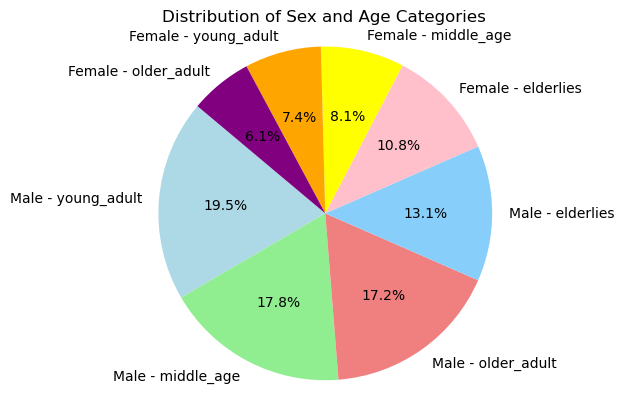

In [16]:
# Data for the pie chart
sex_age_data = {
    ('Male', 'young_adult'): 0.195286,
    ('Male', 'middle_age'): 0.178451,
    ('Male', 'older_adult'): 0.171717,
    ('Male', 'elderlies'): 0.131313,
    ('Female', 'elderlies'): 0.107744,
    ('Female', 'middle_age'): 0.080808,
    ('Female', 'young_adult'): 0.074074,
    ('Female', 'older_adult'): 0.060606,
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{sex} - {age}" for sex, age in sex_age_data.keys()]
sizes = list(sex_age_data.values())

# Colors for the pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'pink', 'yellow', 'orange', 'purple']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of Sex and Age Categories')

# Show the pie chart
plt.show()


In [17]:
#describing the categorical columns
heart_df.describe(exclude=[np.number])

,ChestPain,Thal,AHD,Age_cat,Sex_cat,ExAng_cat
count,297,297,297,297,297,297
unique,4,3,2,4,2,2
top,asymptomatic,normal,No,young_adult,Male,no
freq,142,164,160,80,201,200


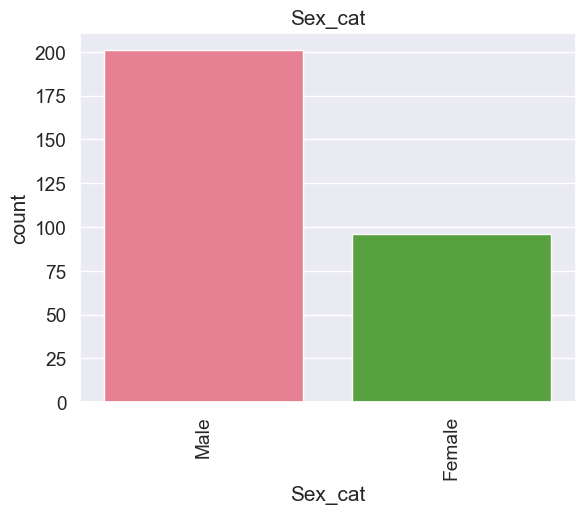

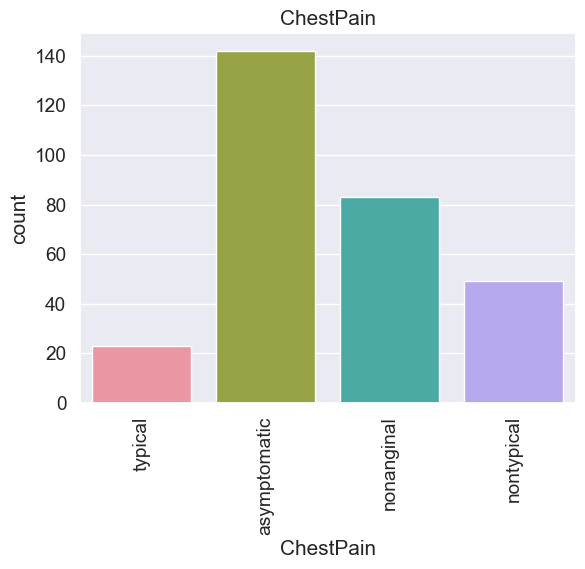

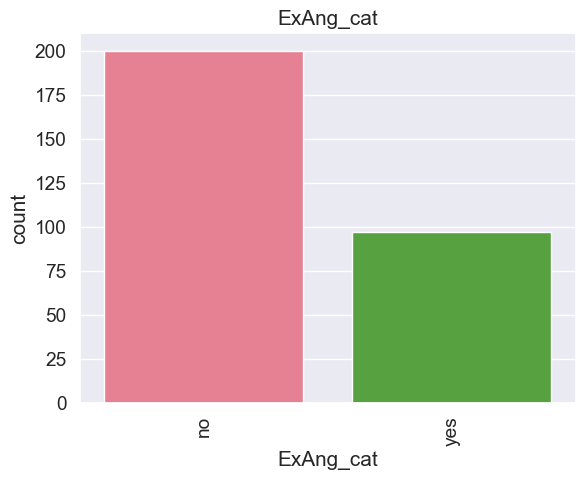

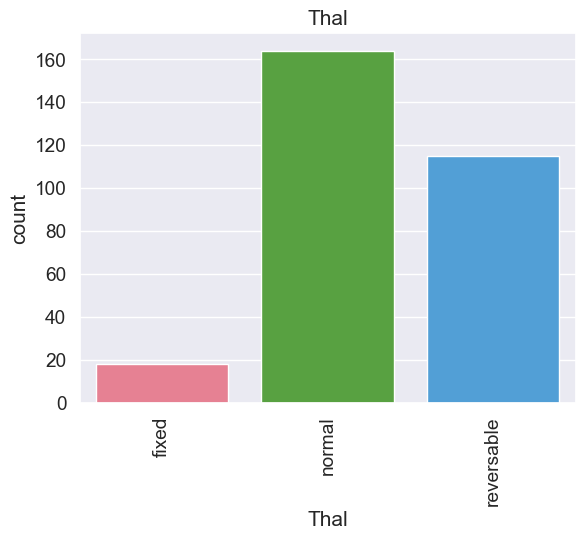

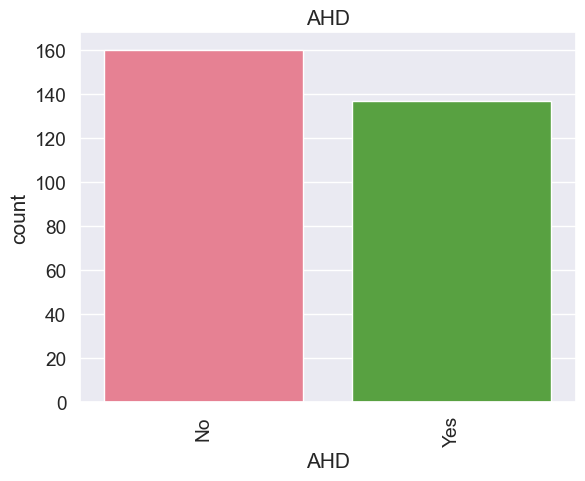

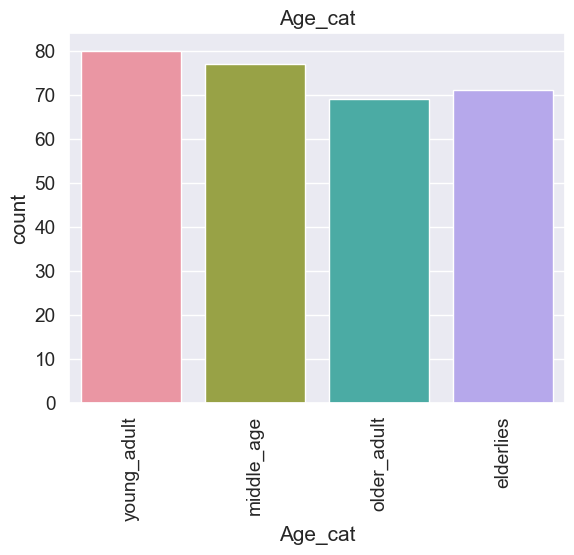

In [18]:
#visualize the information above for easy understanding
#value counting the categorical columns

columns = ['Sex_cat','ChestPain','ExAng_cat','Thal','AHD','Age_cat']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=heart_df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

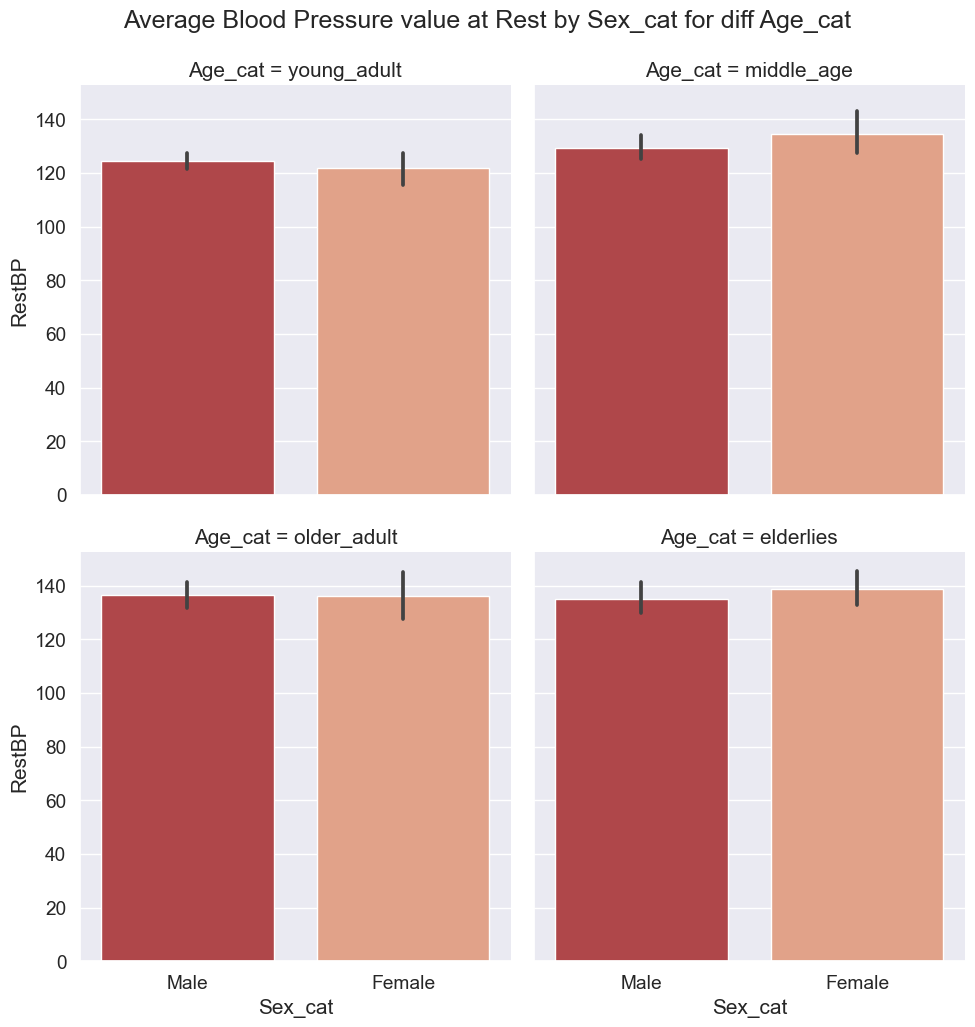

In [19]:
#visualizig Blood pressure at rest by Sex for the different age categories
sns.set_palette('RdBu')
g = sns.catplot(x='Sex_cat',y='RestBP',data=heart_df,kind='bar',col='Age_cat',col_wrap=2)
g.fig.suptitle('Average Blood Pressure value at Rest by Sex_cat for diff Age_cat', y=1.03)
plt.show()

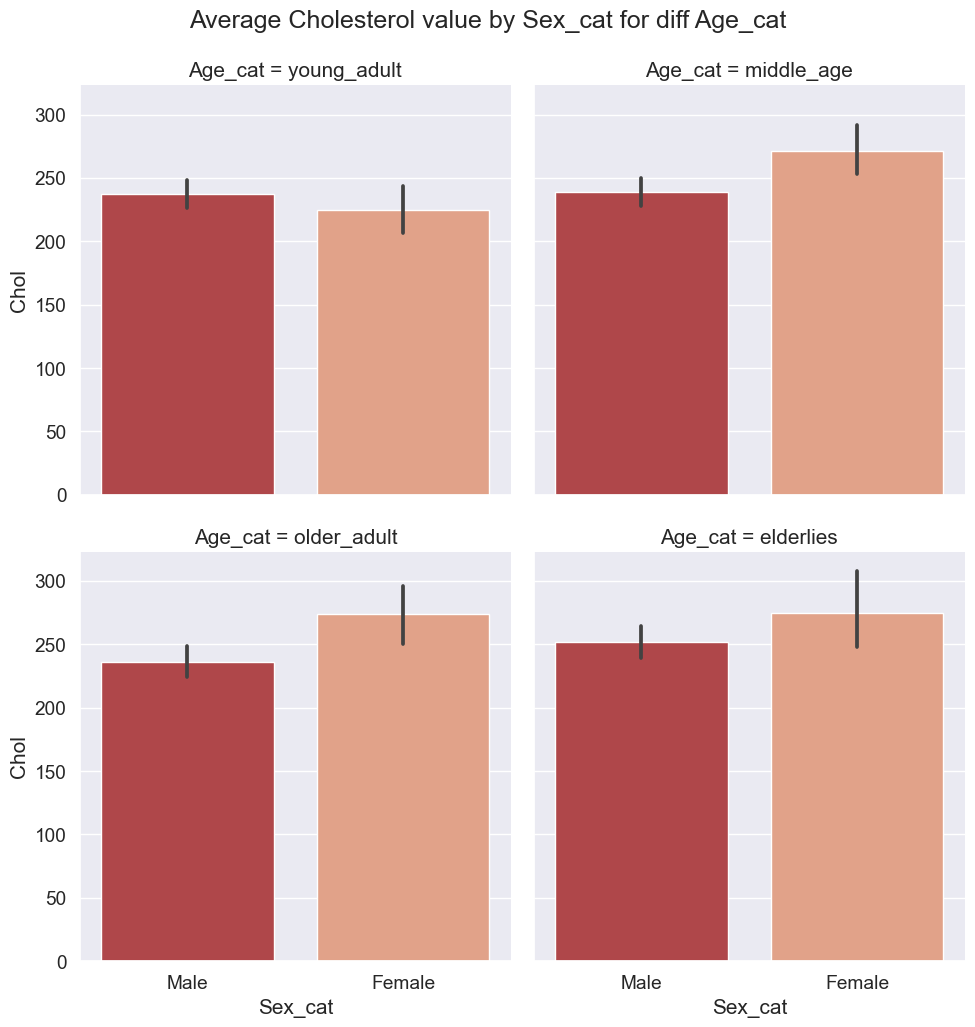

In [20]:
#visualizig Cholesterol by Sex for the different age categories
sns.set_palette('RdBu')
g = sns.catplot(x='Sex_cat',y='Chol',data=heart_df,kind='bar',col='Age_cat',col_wrap=2)
g.fig.suptitle('Average Cholesterol value by Sex_cat for diff Age_cat', y=1.03)
plt.show()

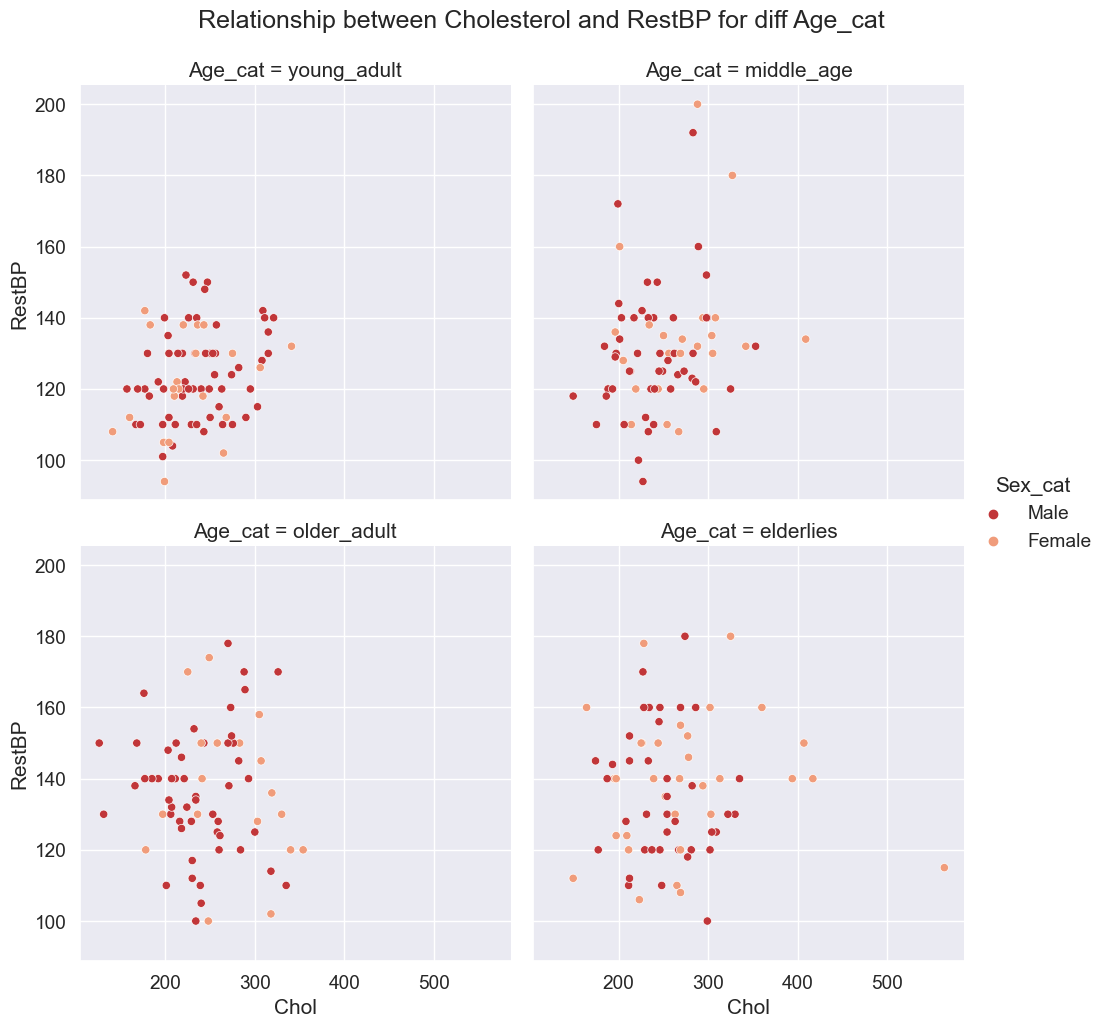

In [21]:
#visualizig RestBP by Chol for the different age categories
sns.set_style('darkgrid')
g = sns.relplot(x='Chol',y='RestBP',data=heart_df,hue='Sex_cat',col='Age_cat',col_wrap=2)
g.fig.suptitle('Relationship between Cholesterol and RestBP for diff Age_cat', y=1.03)
plt.show()

**from the visualizations above :**

- More person(both male and female and across all age categories) experienced asymtomatic angina(chest pain) while few people experienced typical angina.

- From the distribution of BP at rest with Angina it shows that Persons with high blood pressure(BP) had typical angina 

- Males tend to have Angina than females (but this might be seen a result of imbalance within the number of male and female for this dataset), Also most males had asymptomatic Angina(Chest pain).

- The average heart rate for female was slightly higher than that of male

- On average the female Blood pressure tend to increase over the years than male

- On average the female Cholesterol value also tend to increase over the years than male

- There is a relationship between Cholesterol value and RestBP, as Cholesterol value increased Blood Presure at Rest also tend to increase.


## Review and scale numeric variable if necessary

In [22]:
#drop the unnamed column
heart_df.drop(columns=['Unnamed: 0'], inplace=True)

#checking for the types of the data column

heart_df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


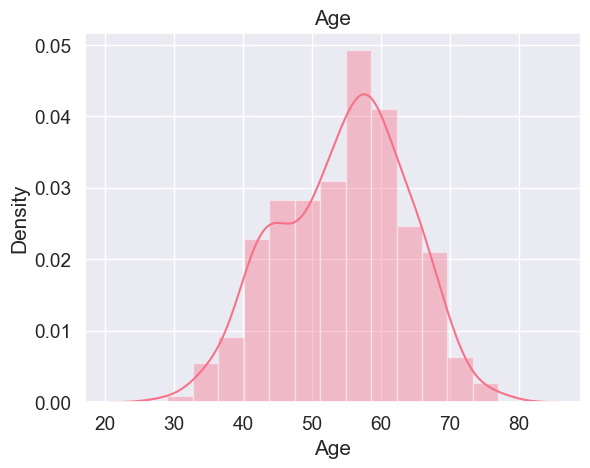

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


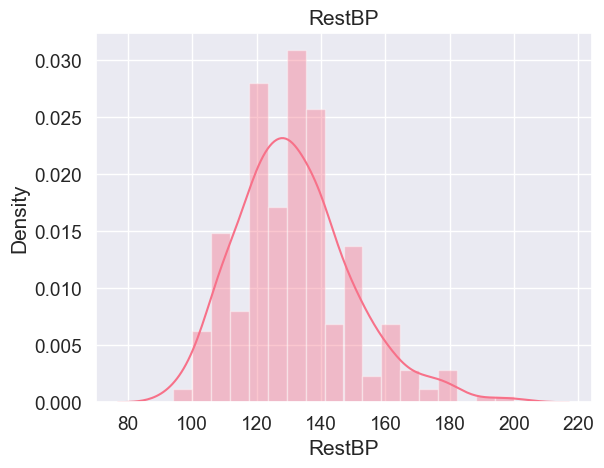

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


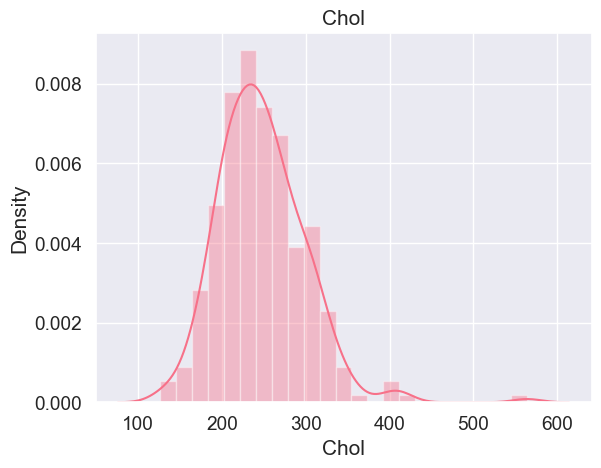

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


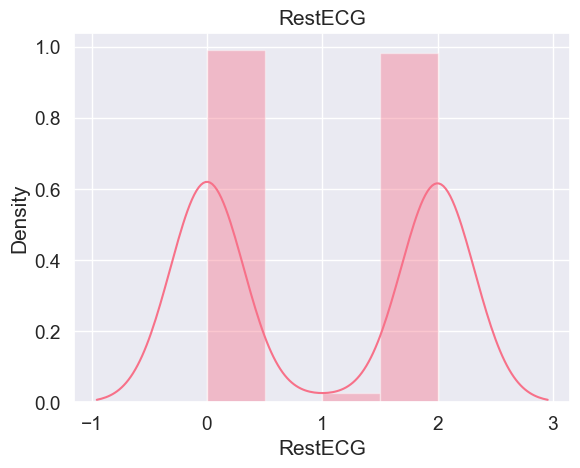

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


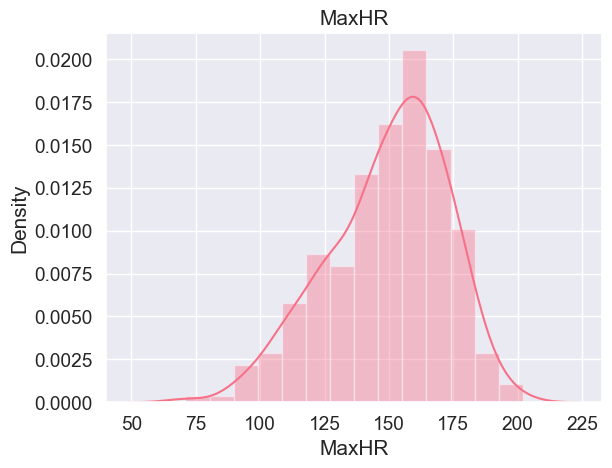

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


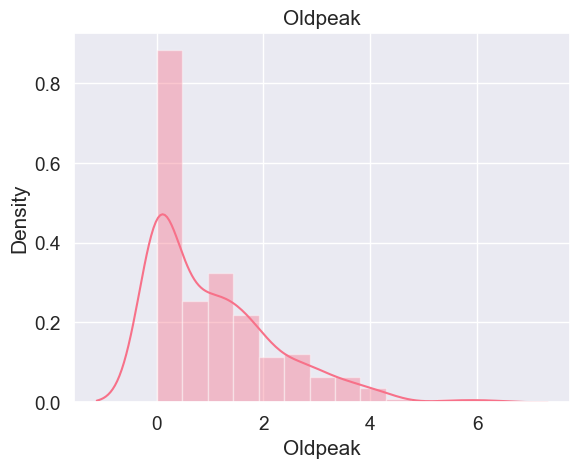

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


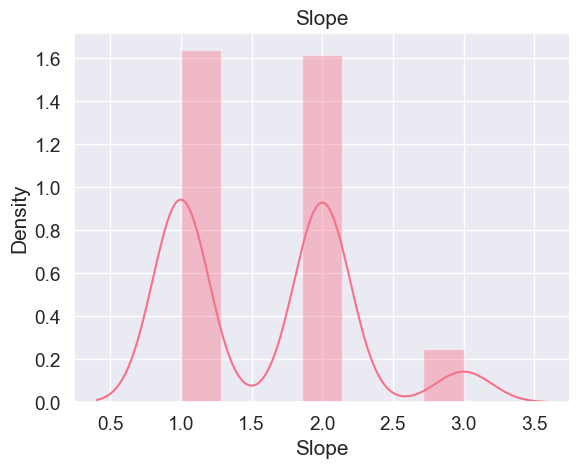

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


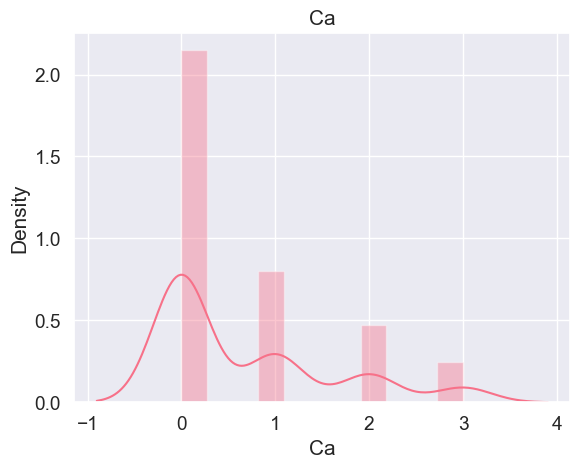

In [23]:
#visualize the information above for easy understanding
#value counting the categorical columns

columns = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak','Slope','Ca']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_dist_count():
    for c in columns:
        sns.distplot(heart_df[c], kde=True)
        plt.title(c)
        plt.show()
        
plot_dist_count()

## Using Normalization to scale variables 

In [24]:
#checking for the variance
heart_df.var()

C:\Users\USER\AppData\Local\Temp\ipykernel_13132\2311347387.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  heart_df.var()


Age          81.897716
Sex           0.219492
RestBP      315.517290
Chol       2703.748589
Fbs           0.124238
RestECG       0.989853
MaxHR       526.315270
ExAng         0.220675
Oldpeak       1.359842
Slope         0.382155
Ca            0.881654
dtype: float64

In [25]:
#normalizing to scale the columns with high variance
heart_df[['Age','RestBP','Chol','MaxHR']] = np.log(heart_df[['Age','RestBP','Chol','MaxHR']])

#checking variance after scaling
heart_df.var()

C:\Users\USER\AppData\Local\Temp\ipykernel_13132\2267186165.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  heart_df.var()


Age        0.030321
Sex        0.219492
RestBP     0.017376
Chol       0.041665
Fbs        0.124238
RestECG    0.989853
MaxHR      0.027261
ExAng      0.220675
Oldpeak    1.359842
Slope      0.382155
Ca         0.881654
dtype: float64

## Using Standardization to scale variables

In [26]:
Columns = ['Age','Sex','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca']

X_val = heart_df[['Age','Sex','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca']].values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_val)

print(X_scaled)

[[ 0.91318003  0.69109474  0.79806485 ...  1.06896529  2.26414539
  -0.72197605]
 [ 1.26729568  0.69109474  1.54611826 ...  0.38177332  0.6437811
   2.47842525]
 [ 1.26729568  0.69109474 -0.63999913 ...  1.32666228  0.6437811
   1.41162482]
 ...
 [ 1.3525204   0.69109474  0.74547589 ...  2.01385425  0.6437811
   1.41162482]
 [ 0.33744362  0.69109474 -0.03174866 ...  0.12407633  0.6437811
   0.34482438]
 [ 0.33744362 -1.44697961 -0.03174866 ... -0.90671163  0.6437811
   0.34482438]]


In [27]:
#creating the scaled dataframe as df
df = pd.DataFrame(data=X_scaled, columns=Columns)
df

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,0.913180,0.691095,0.798065,-0.190665,2.430427,1.010199,0.094335,-0.696419,1.068965,2.264145,-0.721976
1,1.267296,0.691095,1.546118,0.815113,-0.411450,1.010199,-1.898635,1.435916,0.381773,0.643781,2.478425
2,1.267296,0.691095,-0.639999,-0.275643,-0.411450,1.010199,-0.820678,1.435916,1.326662,0.643781,1.411625
3,-2.148431,0.691095,-0.031749,0.154923,-0.411450,-1.003419,1.431904,-0.696419,2.099753,2.264145,-0.721976
4,-1.557906,-1.446980,-0.031749,-0.842943,-0.411450,1.010199,0.924633,-0.696419,0.295874,-0.976583,-0.721976
...,...,...,...,...,...,...,...,...,...,...,...
292,0.337444,-1.446980,0.531403,-0.025000,-0.411450,-1.003419,-1.109628,1.435916,-0.734914,0.643781,-0.721976
293,-1.022398,0.691095,-1.301205,0.422316,-0.411450,-1.003419,-0.681205,-0.696419,0.124076,0.643781,-0.721976
294,1.352520,0.691095,0.745476,-1.114957,2.430427,-1.003419,-0.281051,-0.696419,2.013854,0.643781,1.411625
295,0.337444,0.691095,-0.031749,-3.016521,-0.411450,-1.003419,-1.517634,1.435916,0.124076,0.643781,0.344824


In [28]:
#checking variance after scaling
df.var()

Age        1.003378
Sex        1.003378
RestBP     1.003378
Chol       1.003378
Fbs        1.003378
RestECG    1.003378
MaxHR      1.003378
ExAng      1.003378
Oldpeak    1.003378
Slope      1.003378
Ca         1.003378
dtype: float64

***Based on the provided numerical variable information, it appears that some of the variables may benefit from scaling. Variables like 'Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak', and 'Ca' have different scales and ranges.***

***Scaling is typically useful when applying certain machine learning algorithms that are sensitive to the scale of the variables. It helps to ensure that all variables contribute equally to the model and prevents any bias that may arise due to differences in scale.***

***Therefore To scale the variables, I will be using two different techniques such as standardization (subtracting the mean and dividing by the standard deviation) and normalizing() to show how to scale variables*** 

***Kindly Note that you dont necessarily have to use both method when scaling , I used both just to show how it can be done in the different ways***

***Also, Keep in mind that scaling is not always mandatory, and it depends on the specific context and objectives of your analysis or modeling task.***

## Are there categorical variables in the dataset? pass them to numbers.

In [29]:
#read the normalized heart_df data
heart_df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat,Sex_cat,ExAng_cat
0,4.143135,1,typical,4.976734,5.451038,1,2,5.010635,0,2.3,3,0.0,fixed,No,elderlies,Male,no
1,4.204693,1,asymptomatic,5.075174,5.655992,0,2,4.682131,1,1.5,2,3.0,normal,Yes,elderlies,Male,yes
2,4.204693,1,asymptomatic,4.787492,5.433722,0,2,4.859812,1,2.6,2,2.0,reversable,Yes,elderlies,Male,yes
3,3.610918,1,nonanginal,4.867534,5.521461,0,0,5.231109,0,3.5,3,0.0,normal,No,young_adult,Male,no
4,3.713572,0,nontypical,4.867534,5.318120,0,2,5.147494,0,1.4,1,0.0,normal,No,young_adult,Female,no


In [30]:
#drop all columns not needed
#dropping Age column and use Age_cat inplace
heart_df.drop(columns=['Sex_cat','ExAng_cat','Age'], inplace=True)

#read data
heart_df.head()

,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat
0,1,typical,4.976734,5.451038,1,2,5.010635,0,2.3,3,0.0,fixed,No,elderlies
1,1,asymptomatic,5.075174,5.655992,0,2,4.682131,1,1.5,2,3.0,normal,Yes,elderlies
2,1,asymptomatic,4.787492,5.433722,0,2,4.859812,1,2.6,2,2.0,reversable,Yes,elderlies
3,1,nonanginal,4.867534,5.521461,0,0,5.231109,0,3.5,3,0.0,normal,No,young_adult
4,0,nontypical,4.867534,5.318120,0,2,5.147494,0,1.4,1,0.0,normal,No,young_adult


In [31]:
#using pd.get_dummies to replace categorical variables to numerical

pd.get_dummies(heart_df)

,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,...,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes,Age_cat_young_adult,Age_cat_middle_age,Age_cat_older_adult,Age_cat_elderlies
0,1,4.976734,5.451038,1,2,5.010635,0,2.3,3,0.0,...,1,1,0,0,1,0,0,0,0,1
1,1,5.075174,5.655992,0,2,4.682131,1,1.5,2,3.0,...,0,0,1,0,0,1,0,0,0,1
2,1,4.787492,5.433722,0,2,4.859812,1,2.6,2,2.0,...,0,0,0,1,0,1,0,0,0,1
3,1,4.867534,5.521461,0,0,5.231109,0,3.5,3,0.0,...,0,0,1,0,1,0,1,0,0,0
4,0,4.867534,5.318120,0,2,5.147494,0,1.4,1,0.0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0,4.941642,5.484797,0,0,4.812184,1,0.2,2,0.0,...,0,0,0,1,0,1,0,0,1,0
298,1,4.700480,5.575949,0,0,4.882802,0,1.2,2,0.0,...,1,0,0,1,0,1,1,0,0,0
299,1,4.969813,5.262690,1,0,4.948760,0,3.4,2,2.0,...,0,0,0,1,0,1,0,0,0,1
300,1,4.867534,4.875197,0,0,4.744932,1,1.2,2,1.0,...,0,0,0,1,0,1,0,0,1,0


**After pass categorical variable to numbers there was 23 columns at the end .**

**Also note the Age column was dropped to avoid overfitting as the Age categorical column contained same information .**